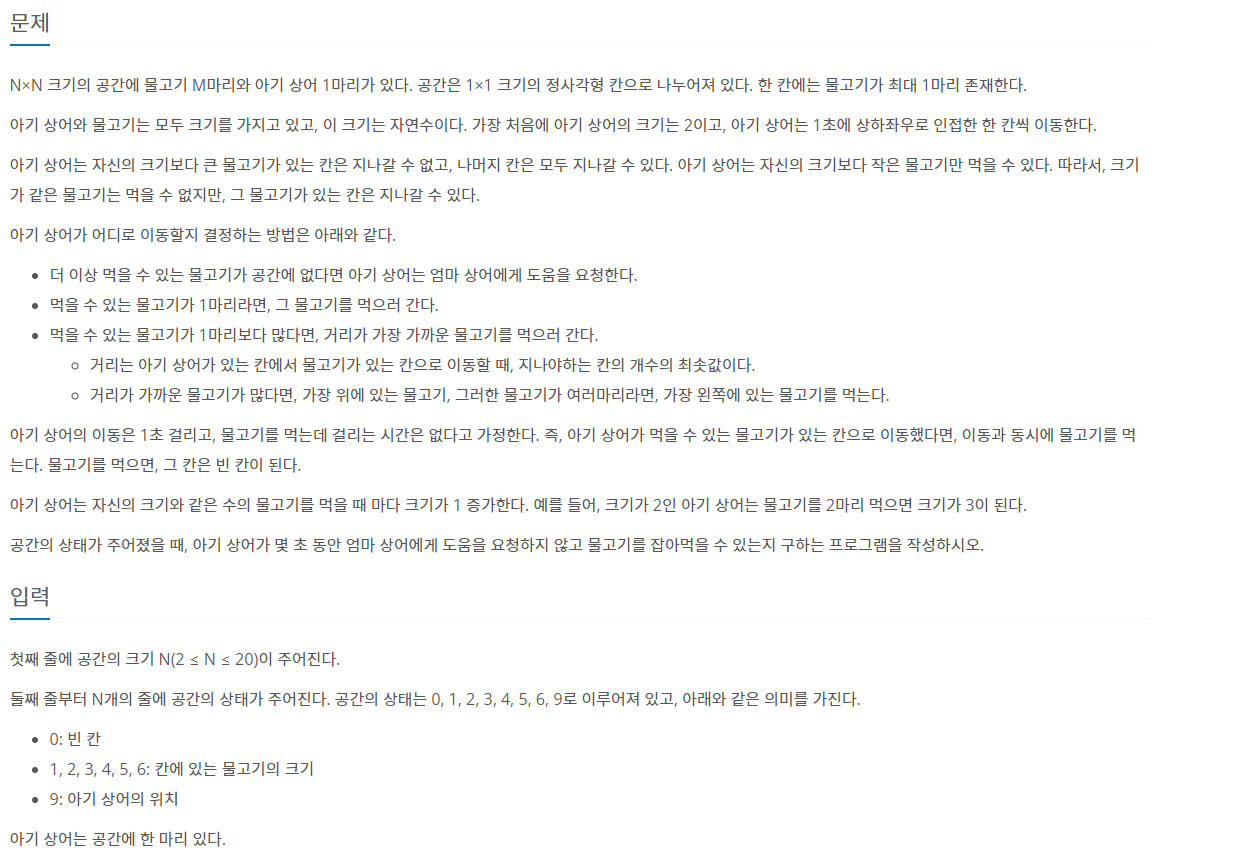

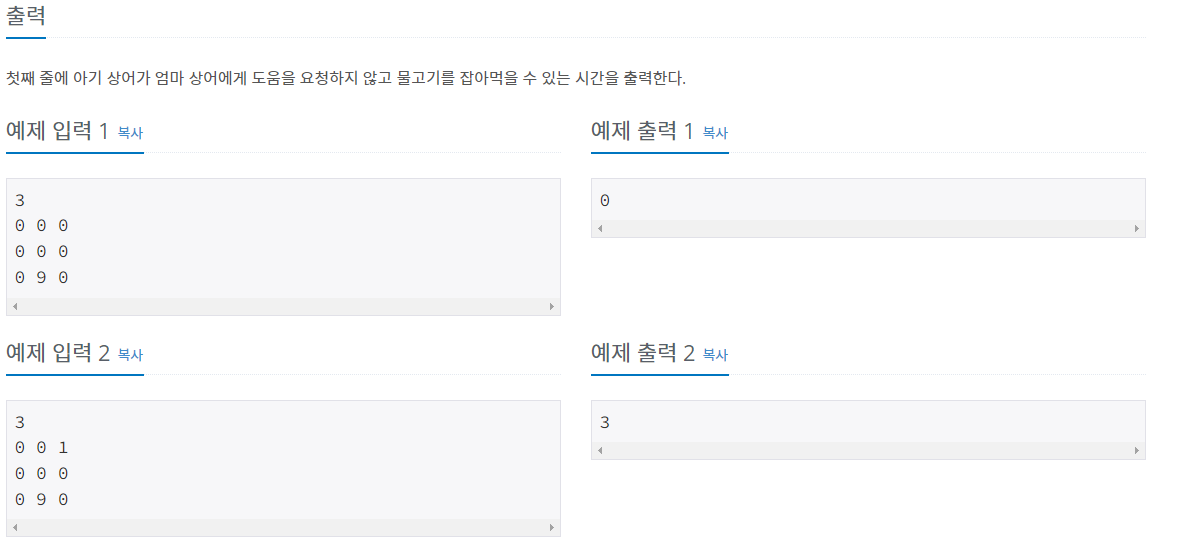

https://www.acmicpc.net/problem/16236

In [2]:
import sys,collections
#input = sys.stdin.readline
shark_x, shark_y = 0,0
shark_size = 2
eat_cnt = 0
fish_cnt = 0
fish_pos = []
time = 0
dx = (0,0,1,-1)
dy = (1,-1,0,0)
n = int(input())
board = [list(map(int, input().split())) for _ in range(n)]
for i in range(n):
    for j in range(n):
        if 0 < board[i][j] <=6:
            fish_cnt +=1
            fish_pos.append((i,j))
        elif board[i][j] == 9:
            shark_x, shark_y = i,j
board[shark_x][shark_y]=0

def bfs(shark_x,shark_y):
    q = collections.deque([(shark_x,shark_y,0)])
    dist_list = []
    visited = [[False]*n for _ in range(n)]
    visited[shark_x][shark_y] = True
    min_dist = int(1e9)
    while q:
        x,y,dist = q.popleft()
        for i in range(4):
            xx = dx[i]+x
            yy = dy[i]+y
            if 0<=xx<n and 0<=yy<n and not visited[xx][yy]:
                if board[xx][yy] <= shark_size:
                    visited[xx][yy] = True
                    if 0<board[xx][yy]<shark_size:
                        min_dist = dist
                        dist_list.append((dist+1,xx,yy))
                    if dist+1 <= min_dist:
                        q.append((xx,yy,dist+1))
    if dist_list:
        dist_list.sort()
        return dist_list[0]
    else:
        return False

while fish_cnt :
    result = bfs(shark_x,shark_y)
    if not result:
        break
    shark_x,shark_y = result[1],result[2]
    time +=result[0]
    eat_cnt+=1
    fish_cnt-=1
    if shark_size == eat_cnt:
        shark_size +=1
        eat_cnt =0
    board[shark_x][shark_y] = 0

print(time)

3
0 0 1
0 0 0
0 9 0
3
